<a href="https://colab.research.google.com/github/Clarice-Satiko-Aoto/Analise_dados_b/blob/WIP/vendas_feat_e_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Carregando os dados

In [152]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/vendas.csv',
                 parse_dates=['data'])
df.head()

,vendas_id,data,nfe,cliente_id,nf_desconto,nf_valor_bruto,nf_valor_venda,itens_venda_id,produto_id,item_quantidade,...,nome_supervisor,gerente_id,nome_gerente,nome_vendedor,categoria_id,descricao,tamanho,custoUnitario,categoria,margem_lucro_unit
0,1,2021-02-16,SO43660,614,24.90,265,240.10,13,43,1,...,Emily Rocha,1,Victor Castro,Isabella Machado,2,Paeonia,M,75,Manga Curta,37
1,3020,2023-06-10,SO87451,50,398.45,5758,5359.55,46451,43,1,...,Sofia Ribeiro,2,Gabriel Azevedo,Fernanda Oliveira,2,Paeonia,M,75,Manga Curta,37
2,993,2021-06-24,SO46324,259,62.80,1014,951.20,7650,43,1,...,Sofia Ribeiro,2,Gabriel Azevedo,Fernanda Oliveira,2,Paeonia,M,75,Manga Curta,37
3,7,2021-02-17,SO43665,347,112.95,1711,1598.05,61,43,1,...,Sofia Ribeiro,2,Gabriel Azevedo,Felipe Gonçalves,2,Paeonia,M,75,Manga Curta,37
4,2443,2022-08-15,SO51151,318,545.55,8066,7520.45,31879,43,1,...,Sofia Ribeiro,2,Gabriel Azevedo,Fernanda Oliveira,2,Paeonia,M,75,Manga Curta,37


In [191]:
meta22 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/Meta_2022.csv')
meta23 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/vendas/data/Meta_2023.xlsx', header=2, usecols=['Categoria Produto', 'Previsão Vendas', '1', '2', '3','4'])

#### Supervisores

In [ ]:
# anos =[2021,2022,2023]
# df_por_ano = {}
# for ano in anos:
#     df_por_ano[ano] = df[df['data'].dt.year == ano]
# df_por_data = pd.concat(df_por_ano.values(), ignore_index=True)
# df_por_data.head()

In [155]:
#separando os dados por supervisor e fazendo o resample mensal

dados_separados = []

for sup in df['nome_supervisor'].unique():
    teste = df[df['nome_supervisor'] == sup]
    teste.set_index('data', inplace=True)
    resultado_resample = teste.resample('M').agg({
        'nf_valor_venda': 'sum',
        'nome_supervisor': 'first',
        'gerente_id':'first',
        'nome_gerente': 'first',
        'nome_vendedor': 'first',
        'categoria_id': 'first'
    })
    dados_separados.append(resultado_resample)

df_completo = pd.concat(dados_separados)
df_completo.reset_index(inplace=True)
df_completo.head()


,data,nf_valor_venda,nome_supervisor,gerente_id,nome_gerente,nome_vendedor,categoria_id
0,2021-02-28,200967.00,Emily Rocha,1,Victor Castro,Isabella Machado,2
1,2021-03-31,859043.75,Emily Rocha,1,Victor Castro,Bruna Maria,2
2,2021-04-30,1440986.10,Emily Rocha,1,Victor Castro,Augusto Bradão,2
3,2021-05-31,864067.85,Emily Rocha,1,Victor Castro,Isabella Machado,2
4,2021-06-30,1329498.20,Emily Rocha,1,Victor Castro,Augusto Bradão,2


#### Meta 2022

In [ ]:
#Padronizando a data
mes = {
    'Jan-22': '2022-01-31',
    'Fev-22': '2022-02-28',
    'Mar-22': '2022-03-31',
    'Abr-22': '2022-04-30',
    'Mai-22': '2022-05-31',
    'Jun-22': '2022-06-30',
    'Jul-22': '2022-07-31',
    'Ago-22': '2022-08-31',
    'Set-22': '2022-09-30',
    'Out-22': '2022-10-31',
    'Nov-22': '2022-11-30',
    'Dez-22': '2022-12-31',
}
meta22.replace(mes, inplace=True)
meta22['Mês'] = pd.to_datetime(meta22['Mês'])
meta22.rename(columns={'Mês': 'data'}, inplace=True)


In [162]:
#concatenando a meta 2022 e o dataset
df_metas_2022 = pd.merge(df_completo, meta22, on=['gerente_id', 'categoria_id', 'data'])
df_metas_2022.head(10)

,data,nf_valor_venda,nome_supervisor,gerente_id,nome_gerente,nome_vendedor,categoria_id,$ Meta
0,2022-01-31,556695.55,Emily Rocha,1,Victor Castro,Bruna Maria,2,31244
1,2022-01-31,891665.25,Diego Araujo,1,Victor Castro,Rodrigo Santiago,2,31244
2,2022-01-31,53904.40,Fernando Silva,1,Victor Castro,Flávio Roberto,2,31244
3,2022-02-28,1811544.80,Emily Rocha,1,Victor Castro,Augusto Bradão,2,26896
4,2022-02-28,333958.30,Diego Araujo,1,Victor Castro,Rodrigo Santiago,2,26896
5,2022-03-31,1158671.00,Emily Rocha,1,Victor Castro,Isabella Machado,2,31559
6,2022-04-30,2264356.30,Emily Rocha,1,Victor Castro,Bruna Maria,2,43437
7,2022-04-30,478735.20,Diego Araujo,1,Victor Castro,Flávia Alessandra,2,43437
8,2022-04-30,2645.00,Fernando Silva,1,Victor Castro,Flávio Roberto,2,43437
9,2022-05-31,2335661.75,Emily Rocha,1,Victor Castro,Bruna Maria,2,50342


#### Meta 2023

In [195]:
#Extraindo apenas o id da categoria
meta23['categoria_id'] = meta23['Categoria Produto'].str.extract('(\d+)')
meta23.drop('Categoria Produto', axis=1, inplace=True)
meta23

,Previsão Vendas,1,2,3,4,categoria_id
0,300000,0.10,0.40,0.33,0.17,1
1,950000,0.20,0.20,0.20,0.40,2
2,250000,0.12,0.33,0.35,0.20,3
3,350000,0.20,0.20,0.20,0.40,4


In [204]:
meta23['1T'] = meta23['Previsão Vendas'] * meta23['1']
meta23['2T'] = meta23['Previsão Vendas'] * meta23['2']
meta23['3T'] = meta23['Previsão Vendas'] * meta23['3']
meta23['4T'] = meta23['Previsão Vendas'] * meta23['4']

In [207]:
meta23

,Previsão Vendas,1,2,3,4,categoria_id,1T,2T,3T,4T
0,300000,0.10,0.40,0.33,0.17,1,30000.0,120000.0,99000.0,51000.0
1,950000,0.20,0.20,0.20,0.40,2,190000.0,190000.0,190000.0,380000.0
2,250000,0.12,0.33,0.35,0.20,3,30000.0,82500.0,87500.0,50000.0
3,350000,0.20,0.20,0.20,0.40,4,70000.0,70000.0,70000.0,140000.0


### Conhecendo os dados

#### **Produtos**

Verificando graficamente a margem de lucro unitario por categoria de produto

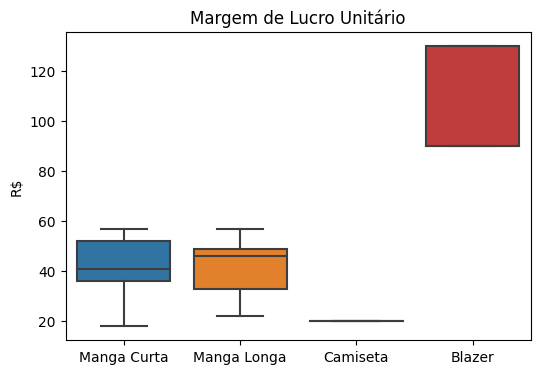

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
plt.title('Margem de Lucro Unitário')
sns.boxplot(data=df, x='categoria', y='margem_lucro_unit')
plt.ylabel('R$')
plt.xlabel(None)
plt.show()

In [12]:
margem = df[['data','categoria', 'descricao', 'tamanho','item_quantidade','custoUnitario','valor_unitario', 'margem_lucro_unit', 'cliente','nf_valor_venda']]
margem.head()

,data,categoria,descricao,tamanho,item_quantidade,custoUnitario,valor_unitario,margem_lucro_unit,cliente,nf_valor_venda
0,2021-02-16,Manga Curta,Paeonia,M,1,75,112,37,Gleichner LLC,240.10
1,2023-06-10,Manga Curta,Paeonia,M,1,75,112,37,"Reichel, Gulgowski and Turner",5359.55
2,2021-06-24,Manga Curta,Paeonia,M,1,75,112,37,Cruickshank-Torp,951.20
3,2021-02-17,Manga Curta,Paeonia,M,1,75,112,37,King-Simonis,1598.05
4,2022-08-15,Manga Curta,Paeonia,M,1,75,112,37,"O'Connell, Wyman and Gleichner",7520.45


In [18]:
marg_camiseta = margem.groupby(['categoria', 'cliente'])['nf_valor_venda'].sum().reset_index().query("categoria =='Camiseta'")

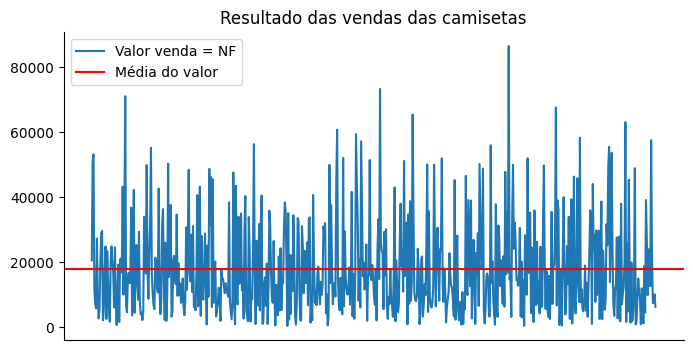

In [19]:
media = marg_camiseta['nf_valor_venda'].mean()

marg_camiseta['nf_valor_venda'].plot(kind='line', figsize=(8, 4), title='Resultado das vendas das camisetas', label='Valor venda = NF')
plt.axhline(y = media, color = 'r', linestyle = '-', label='Média do valor')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks([])  # Oculta os valores do eixo x
plt.legend()
plt.show()

Agrupando por categoria e calculando a média da margem de lucro

In [31]:
# Agrupando por categoria e calculando a média da margem de lucro
grupo_por_categoria = df.groupby('categoria')['margem_lucro_unit'].mean().reset_index().sort_values(by='margem_lucro_unit')

# Exibindo a média da margem de lucro por categoria
print(grupo_por_categoria)


     categoria  margem_lucro_unit
1     Camiseta          20.000000
3  Manga Longa          40.808687
2  Manga Curta          42.241753
0       Blazer         106.921103


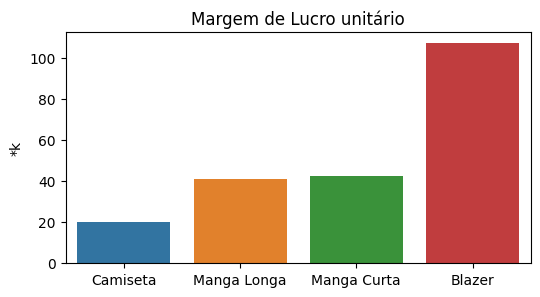

In [39]:
order = ['Blazer', 'Manga Curta', 'Manga Longa', 'Camiseta']
fig, ax = plt.subplots(figsize=(6,3))
sns.barplot(data=grupo_por_categoria, x='categoria', y='margem_lucro_unit', )
plt.title("Margem de Lucro unitário")
plt.xlabel(None)
plt.ylabel('*k')
plt.show()